In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris, make_circles
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn import linear_model

In [2]:
def iris_view(iris):
    x_index = 0
    y_index = 1
    formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

    plt.figure(figsize=(10, 8))
    plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris.feature_names[x_index])
    plt.ylabel(iris.feature_names[y_index])

    plt.tight_layout()

    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.grid(True)
    plt.show()


In [3]:
def iris_logistic_regression( X, y, mt_class = 'auto', penalty = 'l2'):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

    model = LogisticRegression(multi_class=mt_class, penalty = penalty).fit(Xtrain, ytrain)
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap='viridis', shading='auto')

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap='viridis')
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

    predict = model.predict(Xtest)
    print(f'R^2 score: {r2_score(ytest, predict):.2%}')
    print(f'RMSE: {mean_squared_error(ytest, predict):.2%}')
    print(f'MAE: {mean_absolute_error(ytest, predict):.2%}')
    print(f'MAPE: {mean_absolute_percentage_error(ytest, predict):.2%}')

    classes = load_iris().target_names
    confidence_arr =[]
    for i in range(3):
        pred_prob = model.predict_proba(Xtest[i, None])
        ix = pred_prob.argmax(1).item()
        confidence_arr.append(pred_prob[0,ix])

    print(f'Predict proba for classes: {classes} \n\t {confidence_arr}\n')

    param_grid = {'C':[0.1,1,10,100]}
    grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose=3)
    grid.fit(Xtrain, ytrain)

    print(f"Best score: {grid.best_score_}")
    best_estim = grid.best_estimator_
    cv_result = cross_val_score(best_estim, X, y, cv=5)
    print(f"Cross validation results: {cv_result}")

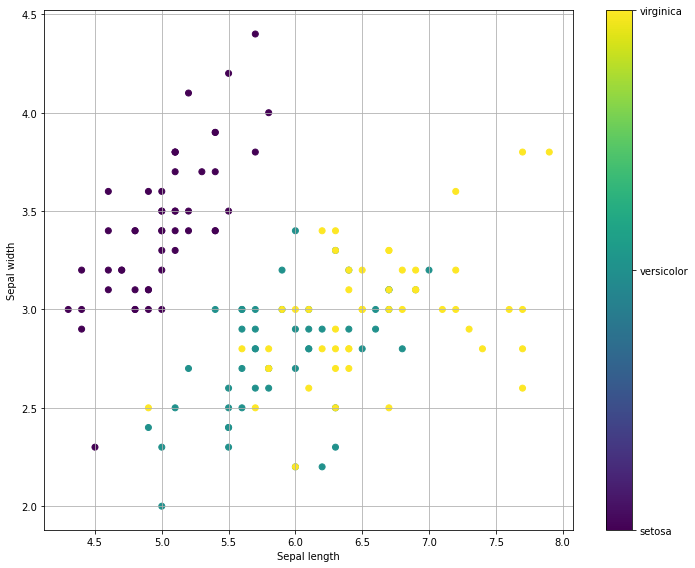

In [4]:
iris = load_iris()
iris_view(iris)
X = iris.data[:, :2]  
y = iris.target

Logistic regression with regularization



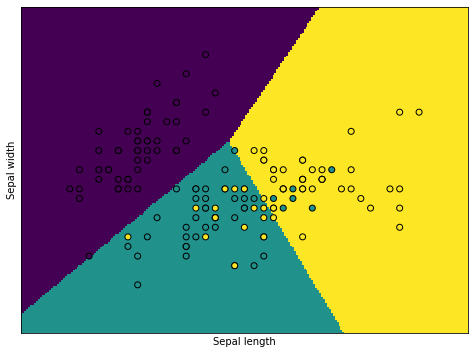

R^2 score: 76.92%
RMSE: 15.79%
MAE: 15.79%
MAPE: 10.53%
Predict proba for classes: ['setosa' 'versicolor' 'virginica'] 
	 [0.9006664317707309, 0.5260419605106738, 0.9544991680815905]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.739 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.783 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.864 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.818 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.636 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.739 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.783 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.909 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.818 total time=   0.0s
[CV 5/5] END ..............

In [5]:
print('Logistic regression with regularization\n')
iris_logistic_regression(X, y)

Logistic regression without regularization



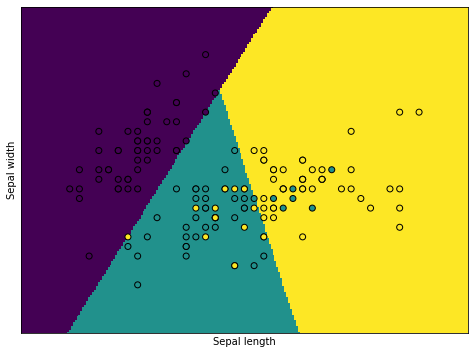

R^2 score: 81.02%
RMSE: 13.16%
MAE: 13.16%
MAPE: 10.53%
Predict proba for classes: ['setosa' 'versicolor' 'virginica'] 
	 [0.6276218010940591, 0.664645202167944, 0.5573673794993403]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.826 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.826 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.818 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.864 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.636 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.826 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.826 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.818 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.818 total time=   0.0s
[CV 5/5] END ...............

In [6]:
print('Logistic regression without regularization\n')
iris_logistic_regression(X, y, penalty = 'none')


Multinomial logistic regression



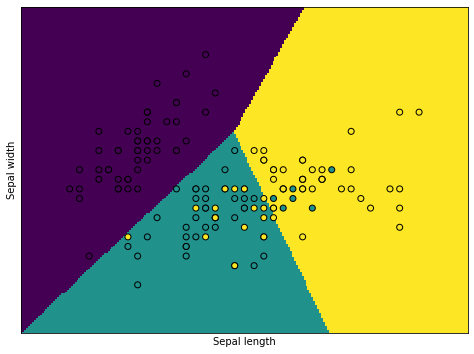

R^2 score: 64.81%
RMSE: 23.68%
MAE: 23.68%
MAPE: 15.79%
Predict proba for classes: ['setosa' 'versicolor' 'virginica'] 
	 [0.6940911263841618, 0.6375645541836745, 0.7327128556078819]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.870 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.870 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.773 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.773 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.727 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.826 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.913 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.773 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.773 total time=   0.0s
[CV 5/5] END ..............

In [7]:
print('\nMultinomial logistic regression\n')
iris_logistic_regression( X, y,'multinomial')


Multinomial logistic regression without regularization



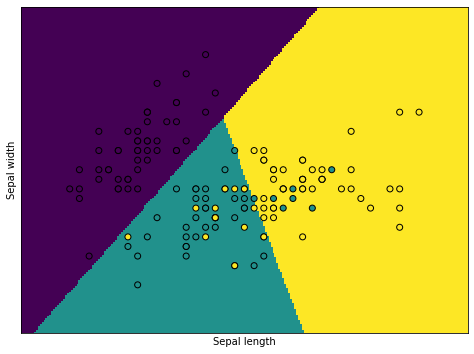

R^2 score: 69.53%
RMSE: 18.42%
MAE: 18.42%
MAPE: 15.79%
Predict proba for classes: ['setosa' 'versicolor' 'virginica'] 
	 [1.0, 1.0, 0.6722038615350968]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.696 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.696 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.818 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.818 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.818 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.739 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.739 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.909 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.909 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0

In [8]:
print('\nMultinomial logistic regression without regularization\n')
iris_logistic_regression( X, y,'multinomial', penalty = 'none')

In [9]:
X,y=make_circles(noise=.1, factor=.1, n_samples=500)
X1 = X[:, 0].flatten()
X2 = X[:, 1].flatten()

In [10]:
scaler = StandardScaler()
XS = scaler.fit_transform(X)

PolyFeatures = PolynomialFeatures(2)

X_NEW = PolyFeatures.fit_transform(XS)

In [11]:
clf = linear_model.SGDClassifier(loss='log', random_state=123)
clf.fit(X_NEW, y)
predict_Y = clf.predict(X_NEW)

In [12]:
def do_fit(classifier, X, y):
    classifier.fit(X, y)
    predict = classifier.predict(X=X)
    
    cmap = ListedColormap(['blue', 'red'])                    
    plt.scatter(X1,X2, c=predict,marker='.', cmap=cmap)
    plt.show()
    
    print(f'R^2 score: {r2_score(y, predict):.2%}')
    print(f'RMSE: {mean_squared_error(y, predict):.2%}')
    print(f'MAE: {mean_absolute_error(y, predict):.2%}')
    print(f'MAPE: {mean_absolute_percentage_error(y, predict):.2%}')
    
    confidence_arr=[]
    for i in range(2):
        y_pred_prob = classifier.predict_proba(X[i, None])
        ix = y_pred_prob.argmax(1).item()
        confidence_arr.append(y_pred_prob[0,ix])
    
    print(f'Predict proba for classes: {confidence_arr}\n')

    print("Grid Search:")
    param_grid = {'C':[0.1,1,10,100]}
    grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose=3)
    grid.fit(X, y)

    print(f"Best score: {grid.best_score_}")
    best_estim = grid.best_estimator_
    cv_result = cross_val_score(best_estim, X, y, cv=5)
    print(f"Cross validation results: {cv_result}")

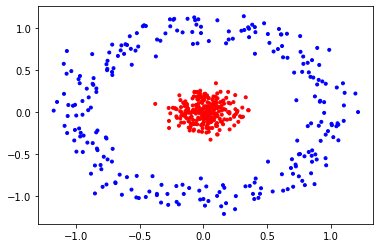

R^2 score: 100.00%
RMSE: 0.00%
MAE: 0.00%
MAPE: 0.00%
Predict proba for classes: [0.9764503202143476, 0.9843419561260293]

Grid Search:
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=1.000 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=1.000 total time=  

In [13]:
regressor = LogisticRegression(solver="liblinear")
do_fit(regressor, X_NEW, y) 

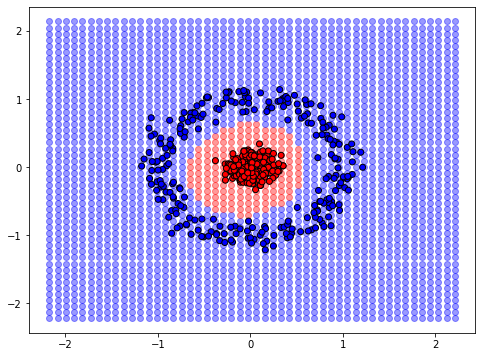

In [18]:
myColorMap = ListedColormap(['blue', 'red'])                    

plt.figure(figsize=(8,6))

x1_min, x1_max = X[:,0].min() - 1, X[ :,0].max() + 1
x2_min, x2_max = X[:,1].min() - 1, X[ :,1].max() + 1

xx1 =np.linspace(x1_min, x1_max, 50)
xx2 =np.linspace(x2_min, x2_max, 50)

for i in range(len(xx1)):
    for j in range(len(xx2)):
        newX=(np.column_stack((xx1[i],xx2[j])))

        newY = clf.predict(PolyFeatures.fit_transform(scaler.transform(newX)))
        yColor=myColorMap(int(newY))
        plt.scatter(xx1[i].flatten(),xx2[j].flatten(),color=yColor,alpha=0.4);

plt.scatter(X[:,0].flatten(),X[:,1].flatten(), c=y.flatten(),  cmap=myColorMap,edgecolor='k');
plt.show()